In [1]:
import json

In [1]:
def developer(desarrollador):
    # Cargar el archivo CSV en un DataFrame
    df = pd.read_csv('resultado_union_actualizado.csv')

    # Filtrar las filas que corresponden al desarrollador dado
    df_desarrollador = df[df['developer'] == desarrollador].copy()  # Añadir .copy() para evitar la advertencia

    # Extraer el año de la columna 'release_date'
    df_desarrollador['year'] = pd.to_datetime(df_desarrollador['release_date']).dt.year

    # Contar la cantidad de juegos "Free to Play" por año
    cantidad_free_to_play = df_desarrollador[df_desarrollador['price'] == 'Free to Play'].groupby('year')['item_id'].count()

    # Contar la cantidad total de items por año
    cantidad_total_items = df_desarrollador.groupby('year')['item_id'].count()

    # Calcular el porcentaje de contenido gratuito por año (reemplazando NaN por 0)
    porcentaje_free_to_play = (cantidad_free_to_play / cantidad_total_items).fillna(0) * 100

    # Crear un DataFrame con los resultados
    resultados = pd.DataFrame({
        'Year': cantidad_free_to_play.index,
        'Cantidad de Free to Play': cantidad_free_to_play.values,
        'Cantidad Total de Items': cantidad_total_items.values,
        'Porcentaje de Contenido Gratuito': porcentaje_free_to_play.values
    })

    return resultados.to_dict(orient='records')  # Convertir el DataFrame a una lista de diccionarios

In [5]:
df

NameError: name 'df' is not defined

In [1]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('resultado_sin_nulos.csv')

# Eliminar filas con valores nulos en las columnas especificadas
df.dropna(subset=['price', 'release_date', 'developer', 'item_id'], inplace=True)

# Opcional: Restablecer el índice del DataFrame después de eliminar filas
df.reset_index(drop=True, inplace=True)

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv('resultado_sin_nulos.csv', index=False)


ModuleNotFoundError: No module named 'pandas'

In [3]:
resultado

NameError: name 'resultado' is not defined

In [2]:
import pandas as pd

# Cargo archivo JSON  en un DataFrame
ruta_json = 'F:\\DATA2_HENRY\\LABS\\PI MLOps - STEAM-20230905T004242Z-001\\PI MLOps - STEAM\\steam_games.json\\output_steam_games.json'  
df = pd.read_json('F:\\DATA2_HENRY\\LABS\\PI MLOps - STEAM-20230905T004242Z-001\\PI MLOps - STEAM\\steam_games.json\\output_steam_games.json', lines=True)

In [3]:
print(df.head())

  publisher genres app_name title   url release_date  tags reviews_url  \
0      None   None     None  None  None         None  None        None   
1      None   None     None  None  None         None  None        None   
2      None   None     None  None  None         None  None        None   
3      None   None     None  None  None         None  None        None   
4      None   None     None  None  None         None  None        None   

   discount_price specs price  early_access  id metascore developer  \
0             NaN  None  None           NaN NaN      None      None   
1             NaN  None  None           NaN NaN      None      None   
2             NaN  None  None           NaN NaN      None      None   
3             NaN  None  None           NaN NaN      None      None   
4             NaN  None  None           NaN NaN      None      None   

             user_id      steam_id  \
0  76561197970982479  7.656120e+16   
1            js41637  7.656120e+16   
2          evc

In [7]:
df.dropna()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,user_id,steam_id,items,items_count,money_spent


In [8]:
print(df)

              publisher                                 genres  \
0                  None                                   None   
1                  None                                   None   
2                  None                                   None   
3                  None                                   None   
4                  None                                   None   
...                 ...                                    ...   
120440  Ghost_RUS Games  [Casual, Indie, Simulation, Strategy]   
120441           Sacada              [Casual, Indie, Strategy]   
120442     Laush Studio            [Indie, Racing, Simulation]   
120443         SIXNAILS                        [Casual, Indie]   
120444             None                                   None   

                        app_name                     title  \
0                           None                      None   
1                           None                      None   
2                    

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   publisher       24083 non-null   object 
 1   genres          28852 non-null   object 
 2   app_name        32133 non-null   object 
 3   title           30085 non-null   object 
 4   url             32135 non-null   object 
 5   release_date    30068 non-null   object 
 6   tags            31972 non-null   object 
 7   reviews_url     32133 non-null   object 
 8   discount_price  225 non-null     float64
 9   specs           31465 non-null   object 
 10  price           30758 non-null   object 
 11  early_access    32135 non-null   float64
 12  id              32133 non-null   float64
 13  metascore       2677 non-null    object 
 14  developer       28836 non-null   object 
 15  user_id         88310 non-null   object 
 16  steam_id        88310 non-null   float64
 17  items     

In [14]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df
df = pd.read_csv('steam_games.csv')

# Define el nombre del archivo JSON de salida
nombre_archivo_json = 'steam_games.json'

# Guarda el DataFrame en formato JSON con conversiones necesarias
df.to_json(nombre_archivo_json, orient='records', lines=True, force_ascii=False)

# El parámetro 'orient' define la estructura del archivo JSON.
# 'records' crea un JSON de estilo de lista de registros.
# 'lines' genera un archivo JSON con un registro por línea.
# 'force_ascii=False' permite caracteres no ASCII en la salida.

print(f'DataFrame guardado en "{nombre_archivo_json}" en formato JSON.')


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10636\1232904777.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,9,10,14,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('steam_games.csv')


PermissionError: [Errno 13] Permission denied: 'steam_games.json'

In [5]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con las siguientes columnas:
# user_id, user_url, reviews

# Función para calcular el dinero gastado por el usuario (ejemplo)
def calcular_dinero_gastado(user_id):
    # Aquí debes reemplazar esta lógica con tu propio método para calcular el dinero gastado.
    # Por ahora, simplemente retornamos 0.
    return 0

# Función para calcular el porcentaje de recomendación en base a reviews.recommend
def calcular_porcentaje_recomendacion(steam_id):
    if not steam_id:
        return 0
    
    # Suponemos que 'reviews' es una lista de recomendaciones True/False en cada revisión.
    total_reviews = len(reviews_url)
    recomendaciones = sum(reviews_url)
    porcentaje_recomendacion = (recomendaciones / total_reviews) * 100
    return porcentaje_recomendacion

# Función para contar la cantidad de items (reseñas) por usuario
def contar_items(reviews_url):
    return len(reviews_url)

# Aplicar las funciones a las columnas correspondientes
df['money_spent'] = df['user_id'].apply(calcular_dinero_gastado)
df['recommendation_percentage'] = df['reviews_url'].apply(calcular_porcentaje_recomendacion)
df['total_items'] = df['reviews_url'].apply(contar_items)

# Ver el DataFrame resultante
print(df)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [19]:
df.to_csv('steam_games.csv', index=False)

In [18]:
df

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,user_id,steam_id,items,items_count
0,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,76561197970982479,7.656120e+16,"[{'item_id': '10', 'item_name': 'Counter-Strik...",277.0
1,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,js41637,7.656120e+16,"[{'item_id': '10', 'item_name': 'Counter-Strik...",888.0
2,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,evcentric,7.656120e+16,"[{'item_id': '1200', 'item_name': 'Red Orchest...",137.0
3,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,Riot-Punch,7.656120e+16,"[{'item_id': '10', 'item_name': 'Counter-Strik...",328.0
4,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,doctr,7.656120e+16,"[{'item_id': '300', 'item_name': 'Day of Defea...",541.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,1.49,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,None,"Nikita ""Ghost_RUS""",None,NaN,None,NaN
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,4.24,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,None,Sacada,None,NaN,None,NaN
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,None,Laush Dmitriy Sergeevich,None,NaN,None,NaN
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,None,"xropi,stev3ns",None,NaN,None,NaN


In [16]:
num_filas, num_columnas = df.shape

# Usando la función len() para obtener el número de filas
num_filas = len(df)

print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')


Número de filas: 120445
Número de columnas: 19


In [2]:
import pandas as pd
import numpy as np

# Calcular la cantidad de valores nulos por columna
valores_nulos_por_columna = df.isna().sum()

# Calcular la cantidad total de valores nulos en el DataFrame
total_valores_nulos = df.isna().sum().sum()

print("valores nulos por columna:")
print(valores_nulos_por_columna)
print("\nvalores nulos en el DataFrame:", total_valores_nulos)


ModuleNotFoundError: No module named 'pandas'

In [5]:
import pandas as pd
import gzip
import ast

def leer_archivo_comprimido():
    with gzip.open('F:\\DATA2_HENRY\\LABS\\PI MLOps - STEAM-20230905T004242Z-001\\PI MLOps - STEAM\\venv\\cabaez_labs\\users_items.json.gz', 'rt', encoding='iso-8859-1', errors='ignore') as file:
        return [ast.literal_eval(line.strip())
                for line in file]

# lee el archivo comprimido a través de la función
misdatos = leer_archivo_comprimido()


datosr2 = pd.DataFrame(misdatos)


print(datosr2)

                       user_id  items_count           steam_id  \
0            76561197970982479          277  76561197970982479   
1                      js41637          888  76561198035864385   
2                    evcentric          137  76561198007712555   
3                   Riot-Punch          328  76561197963445855   
4                        doctr          541  76561198002099482   
...                        ...          ...                ...   
88305        76561198323066619           22  76561198323066619   
88306        76561198326700687          177  76561198326700687   
88307  XxLaughingJackClown77xX            0  76561198328759259   
88308        76561198329548331            7  76561198329548331   
88309        edward_tremethick            0  76561198331598578   

                                                user_url  \
0      http://steamcommunity.com/profiles/76561197970...   
1                   http://steamcommunity.com/id/js41637   
2                 http://st

In [2]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('usuarios_items.csv')

# Extraer 'playtime_forever' y 'user_id'
playtime_forever = df['items'].apply(lambda x: x['playtime_forever'])
user_id = df['user_id']

# Crear un nuevo DataFrame con los datos extraídos
nuevo_df = pd.DataFrame({'user_id': user_id, 'playtime_forever': playtime_forever})

# Guardar el nuevo DataFrame en un archivo CSV
nuevo_df.to_csv('nuevos_datos.csv', index=False)


TypeError: string indices must be integers

In [3]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('usuarios_items.csv')

# Crear listas para almacenar los valores extraídos
user_ids = []
playtime_forevers = []

# Iterar a través de las filas y extraer los valores
for index, row in df.iterrows():
    for item in row['items']:
        user_ids.append(row['user_id'])
        playtime_forevers.append(item['playtime_forever'])

# Crear un nuevo DataFrame con los datos extraídos
nuevo_df = pd.DataFrame({'user_id': user_ids, 'playtime_forever': playtime_forevers})

# Guardar el nuevo DataFrame en un archivo CSV
nuevo_df.to_csv('nuevos_datos.csv', index=False)


TypeError: string indices must be integers

In [4]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('usuarios_items.csv')

# Crear una nueva lista para almacenar los datos
nuevos_datos = []

# Iterar sobre las filas del DataFrame
for index, row in df.iterrows():
    user_id = row['user_id']
    items = row['items']
    
    for item in items:
        item_id = item['item_id']
        playtime_forever = item['playtime_forever']
        
        nuevos_datos.append({'user_id': user_id, 'item_id': item_id, 'playtime_forever': playtime_forever})

# Crear un nuevo DataFrame con los datos extraídos
nuevo_df = pd.DataFrame(nuevos_datos)

# Guardar el nuevo DataFrame en un archivo CSV
nuevo_df.to_csv('nuevos_datos.csv', index=False)


TypeError: string indices must be integers

In [5]:
import pandas as pd
import ast

# Cargar el archivo CSV
df = pd.read_csv('usuarios_items.csv')

# Función para evaluar las listas en la columna "items"
def eval_items(items_str):
    try:
        return ast.literal_eval(items_str)
    except (ValueError, SyntaxError):
        return []

# Aplicar la función a la columna "items"
df['items'] = df['items'].apply(eval_items)

# Crear una nueva lista para almacenar los datos
nuevos_datos = []

# Iterar sobre las filas del DataFrame
for index, row in df.iterrows():
    user_id = row['user_id']
    items = row['items']
    
    for item in items:
        item_id = item.get('item_id')
        playtime_forever = item.get('playtime_forever')
        
        nuevos_datos.append({'user_id': user_id, 'item_id': item_id, 'playtime_forever': playtime_forever})

# Crear un nuevo DataFrame con los datos extraídos
nuevo_df = pd.DataFrame(nuevos_datos)

# Guardar el nuevo DataFrame en un archivo CSV
nuevo_df.to_csv('nuevos_datos_extraido.csv', index=False)


In [7]:
import pandas as pd

# Cargar los archivos CSV
resultado_union = pd.read_csv('resultado_union.csv')
nuevos_datos = pd.read_csv('nuevos_datos_extraido.csv')

# Unir los DataFrames por la columna 'user_id'
resultado_final = pd.merge(resultado_union, nuevos_datos, on='user_id', how='inner')

# Guardar el DataFrame unido en un nuevo archivo CSV
resultado_final.to_csv('resultado_final_unido.csv', index=False)


In [9]:
import pandas as pd

# Cargar los archivos CSV
resultado_union = pd.read_csv('resultado_union.csv')
nuevos_datos = pd.read_csv('nuevos_datos_extraido.csv')

# Realizar la unión por la columna 'user_id'
resultado_union = resultado_union.merge(nuevos_datos[['user_id', 'playtime_forever']], on='user_id', how='inner')

# Guardar el DataFrame resultante en un archivo CSV
resultado_union.to_csv('resultado_union_actualizado.csv', index=False)


In [2]:
import pandas as pd

# Cargar los archivos CSV
resultado_union = pd.read_csv('resultado_union.csv')
nuevos_datos = pd.read_csv('nuevos_datos_extraido.csv')

# Eliminar duplicados y valores nulos en ambos DataFrames
resultado_union.drop_duplicates(subset=['user_id'], inplace=True)
resultado_union.dropna(subset=['user_id'], inplace=True)

nuevos_datos.drop_duplicates(subset=['user_id'], inplace=True)
nuevos_datos.dropna(subset=['user_id'], inplace=True)

# Realizar la unión por la columna 'user_id'
resultado_union = resultado_union.merge(nuevos_datos[['user_id', 'playtime_forever']], on='user_id', how='inner')

# Guardar el DataFrame resultante en un archivo CSV
resultado_union.to_csv('resultado_union_actualizado.csv', index=False)


In [1]:
datosr2

NameError: name 'datosr2' is not defined

In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('resultado_union_actualizado.csv')

# Solicitar al usuario el género que desea buscar
genero_a_buscar = input("Ingrese el género que desea buscar: ")

# Crear un DataFrame que contenga solo las filas con el género especificado
genero_df = df[df['genres'].str.contains(genero_a_buscar, case=False, na=False)]

# Calcular el ranking de acuerdo a 'playtime_forever' para el género especificado
genero_df.loc[:, 'rank'] = genero_df['playtime_forever'].rank(ascending=False, method='min')


# Mostrar el ranking del género especificado
if genero_df.empty:
    print(f"El género '{genero_a_buscar}' no se encuentra en el dataset.")
else:
    ranking = genero_df['rank'].iloc[0]
    print(f"El género '{genero_a_buscar}' está en el puesto {int(ranking)} en el ranking de acuerdo a 'playtime_forever'.")


El género 'action' está en el puesto 9565 en el ranking de acuerdo a 'playtime_forever'.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7072\3243849094.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genero_df.loc[:, 'rank'] = genero_df['playtime_forever'].rank(ascending=False, method='min')


In [16]:
import pandas as pd

def userforgenre(genero):
    # Cargar el archivo CSV en un DataFrame
    df = pd.read_csv('resultado_union_actualizado.csv')

    # Impresión intermedia para verificar que se cargaron los datos correctamente
    print("Datos cargados desde CSV:")
    print(df.head())  # Muestra las primeras filas del DataFrame

    # Filtrar las filas que corresponden al género dado en la columna 'genres'
    df_genero = df[df['genres'].str.contains(genero)]

    # Impresión intermedia para verificar el DataFrame después de filtrar por género
    print(f"Datos filtrados para el género '{genero}':")
    print(df_genero.head())  # Muestra las primeras filas después del filtro

    # Ordenar el DataFrame por horas de juego en orden descendente
    df_genero_sorted = df_genero.sort_values(by='playtime_forever', ascending=False)

    # Impresión intermedia para verificar el DataFrame después de ordenar
    print("Datos ordenados por horas de juego:")
    print(df_genero_sorted.head())  # Muestra las primeras filas después de ordenar

    # Tomar los 5 primeros usuarios
    top_5_usuarios = df_genero_sorted.head(5)

    # Impresión intermedia para verificar los 5 primeros usuarios
    print("Top 5 usuarios:")
    print(top_5_usuarios)

    # Obtener una lista de diccionarios con la información requerida
    resultado = top_5_usuarios[['user_id', 'URL', 'playtime_forever']].to_dict(orient='records')

    return resultado

# Ejemplo de uso
genero = 'Adventure'
top_usuarios = userforgenre(genero)
for usuario in top_usuarios:
    print(usuario)


Datos cargados desde CSV:
             user_id  item_id  recommend  \
0  76561197970982479   1250.0       True   
1            VVillis   1250.0       True   
2         jarrodtrim   1250.0       True   
3  76561198073784601   1250.0       True   
4  76561198084390807   1250.0       True   

                                              review fecha_convertida  \
0  Simple yet with great replayability. In my opi...       2011-11-05   
1  Amazing, Non-stop action of blowing stuff to b...       2015-03-30   
2  Compared to Left 4 Dead 2, this game REALLY gi...       2013-07-12   
3                                 Jogo â¥â¥â¥â¥.       2015-08-13   
4  cara nas imagens esse jogo da pouco de medo ma...       2014-04-05   

   Unnamed: 0             publisher      genres       app_name          title  \
0      119997  Tripwire Interactive  ['Action']  Killing Floor  Killing Floor   
1      119997  Tripwire Interactive  ['Action']  Killing Floor  Killing Floor   
2      119997  Tripwire Int

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [21]:
import pandas as pd

def userforgenre(genero):
    # Cargar el archivo CSV en un DataFrame
    df = pd.read_csv('resultado_union_actualizado.csv')

    # Tratar los valores faltantes en la columna 'genres'
    df['genres'] = df['genres'].fillna('')  # Reemplaza los NaN con una cadena vacía

    # Filtrar las filas que corresponden al género dado en la columna 'genres'
    df_genero = df[df['genres'].str.contains(genero)]

        # Ordenar el DataFrame por horas de juego en orden descendente
    df_genero_sorted = df_genero.sort_values(by='playtime_forever', ascending=False)

     # Tomar los 5 primeros usuarios
    top_5_usuarios = df_genero_sorted.head(5)

    # Obtener una lista de diccionarios con la información requerida
    resultado = top_5_usuarios[['user_id', 'url', 'playtime_forever']].to_dict(orient='records')

    return resultado

# Ejemplo de uso
genero = 'Action'
top_usuarios = userforgenre(genero)
for usuario in top_usuarios:
    print(usuario)


{'user_id': 'jiumohoo', 'url': 'http://store.steampowered.com/app/730/CounterStrike_Global_Offensive/', 'playtime_forever': 356217}
{'user_id': 'GremoryEagle', 'url': 'http://store.steampowered.com/app/211820/Starbound/', 'playtime_forever': 336763}
{'user_id': '76561198078738103', 'url': 'http://store.steampowered.com/app/440/Team_Fortress_2/', 'playtime_forever': 303466}
{'user_id': 'TURTLESYEA', 'url': 'http://store.steampowered.com/app/208650/Batman_Arkham_Knight/', 'playtime_forever': 230158}
{'user_id': 'Asyamercilicious', 'url': 'http://store.steampowered.com/app/301520/Robocraft/', 'playtime_forever': 202538}


In [29]:
import pandas as pd

def developer(desarrollador):
    # Cargar el archivo CSV en un DataFrame
    df = pd.read_csv('resultado_union_actualizado.csv')

    # Filtrar las filas que corresponden al desarrollador dado
    df_desarrollador = df[df['developer'] == desarrollador].copy()  # Añadir .copy() para evitar la advertencia

    # Extraer el año de la columna 'release_date'
    df_desarrollador['year'] = pd.to_datetime(df_desarrollador['release_date']).dt.year

    # Agrupar los datos por año y contar la cantidad de elementos y calcular el porcentaje de contenido gratuito
    resumen_por_anio = df_desarrollador.groupby('year').agg({'item_id': 'count', 'discount_price': 'mean'})

    # Renombrar las columnas
    resumen_por_anio = resumen_por_anio.rename(columns={'item_id': 'Cantidad de Items', 'discount_price': 'Porcentaje de Contenido Gratuito'})

    # Formatear el porcentaje como un valor entre 0 y 100
    resumen_por_anio['Porcentaje de Contenido Gratuito'] = (1 - resumen_por_anio['Porcentaje de Contenido Gratuito']) * 100

    return resumen_por_anio

# Ejemplo de uso
desarrollador = 'HandMade Game'  # Reemplaza con el nombre real del desarrollador
resumen = developer(desarrollador)
print(resumen)


      Cantidad de Items  Porcentaje de Contenido Gratuito
year                                                     
2014                  1                               NaN


In [33]:
import pandas as pd

def developer(desarrollador):
    # Cargar el archivo CSV en un DataFrame
    df = pd.read_csv('resultado_union_actualizado.csv')

    # Filtrar las filas que corresponden al desarrollador dado
    df_desarrollador = df[df['developer'] == desarrollador].copy()  # Añadir .copy() para evitar la advertencia

    # Extraer el año de la columna 'release_date'
    df_desarrollador['year'] = pd.to_datetime(df_desarrollador['release_date']).dt.year

    # Contar la cantidad de juegos "Free to Play" por año
    cantidad_free_to_play = df_desarrollador[df_desarrollador['price'] == 'Free'].groupby('year')['item_id'].count()

    # Contar la cantidad total de items por año
    cantidad_total_items = df_desarrollador.groupby('year')['item_id'].count()

    # Calcular el porcentaje de contenido gratuito por año
    porcentaje_free_to_play = (cantidad_free_to_play / cantidad_total_items) * 100

    # Crear un DataFrame con los resultados
    resultados = pd.DataFrame({
        'Cantidad de Free to Play': cantidad_free_to_play,
        'Cantidad Total de Items': cantidad_total_items,
        'Porcentaje de Contenido Gratuito': porcentaje_free_to_play
    })

    return resultados

# Ejemplo de uso
desarrollador = 'Rockstar Studios'  # Reemplaza con el nombre real del desarrollador
resumen = developer(desarrollador)
print(resumen)


      Cantidad de Free to Play  Cantidad Total de Items  \
year                                                      
2012                       NaN                       16   

      Porcentaje de Contenido Gratuito  
year                                    
2012                               NaN  


In [35]:
import pandas as pd

def developer(desarrollador):
    # Cargar el archivo CSV en un DataFrame
    df = pd.read_csv('resultado_union_actualizado.csv')

    # Filtrar las filas que corresponden al desarrollador dado
    df_desarrollador = df[df['developer'] == desarrollador].copy()  # Añadir .copy() para evitar la advertencia

    # Extraer el año de la columna 'release_date'
    df_desarrollador['year'] = pd.to_datetime(df_desarrollador['release_date']).dt.year

    # Contar la cantidad de juegos "Free to Play" por año
    cantidad_free_to_play = df_desarrollador[df_desarrollador['price'] == 'Free'].groupby('year')['item_id'].count()

    # Contar la cantidad total de items por año
    cantidad_total_items = df_desarrollador.groupby('year')['item_id'].count()

    # Calcular el porcentaje de contenido gratuito por año (reemplazando NaN por 0)
    porcentaje_free_to_play = (cantidad_free_to_play / cantidad_total_items).fillna(0) * 100

    # Crear un DataFrame con los resultados
    resultados = pd.DataFrame({
        'Cantidad de Free to Play': cantidad_free_to_play,
        'Cantidad Total de Items': cantidad_total_items,
        'Porcentaje de Contenido Gratuito': porcentaje_free_to_play
    })

    return resultados

# Ejemplo de uso
desarrollador = 'Tripwire Interactive'  # Reemplaza con el nombre real del desarrollador
resumen = developer(desarrollador)
print(resumen)


      Cantidad de Free to Play  Cantidad Total de Items  \
year                                                      
2009                       NaN                      113   
2011                       NaN                       37   
2016                       NaN                       44   

      Porcentaje de Contenido Gratuito  
year                                    
2009                               0.0  
2011                               0.0  
2016                               0.0  


In [45]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def sentiment_analysis(año):
    # Cargar el archivo CSV en un DataFrame y convertir la columna 'fecha_convertida' a datetime
    df = pd.read_csv('resultado_union_actualizado.csv', parse_dates=['fecha_convertida'])

    # Filtrar las reseñas para el año especificado
    df_filtrado = df[df['fecha_convertida'].dt.year == año]

    # Inicializar el analizador de sentimiento VADER
    sia = SentimentIntensityAnalyzer()

    # Inicializar un contador para cada categoría de sentimiento
    sentiment_counts = {'Negative': 0, 'Neutral': 0, 'Positive': 0}

    # Realizar el análisis de sentimiento para cada reseña
    for index, row in df_filtrado.iterrows():
        review = row['review']
        sentiment = sia.polarity_scores(review)
        
        # Determinar la categoría de sentimiento y actualizar el contador
        if sentiment['compound'] >= 0.05:
            sentiment_counts['Positive'] += 1
        elif sentiment['compound'] <= -0.05:
            sentiment_counts['Negative'] += 1
        else:
            sentiment_counts['Neutral'] += 1

    return sentiment_counts

# Ejemplo de uso
año = 2014  # Reemplaza con el año que desees analizar
resultados = sentiment_analysis(año)
print(resultados)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


AttributeError: 'float' object has no attribute 'encode'

In [48]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def sentiment_analysis(año):
    # Cargar el archivo CSV en un DataFrame y convertir la columna 'fecha_convertida' a datetime
    df = pd.read_csv('resultado_union_actualizado.csv', parse_dates=['fecha_convertida'])

    # Filtrar las reseñas para el año especificado
    df_filtrado = df[df['fecha_convertida'].dt.year == año]

    # Eliminar filas con valores NaN en la columna 'review'
    df_filtrado = df_filtrado.dropna(subset=['review'])

    # Inicializar el analizador de sentimiento VADER
    sia = SentimentIntensityAnalyzer()

    # Inicializar un contador para cada categoría de sentimiento
    sentiment_counts = {'Negative': 0, 'Neutral': 0, 'Positive': 0}

    # Realizar el análisis de sentimiento para cada reseña
    for index, row in df_filtrado.iterrows():
        review = row['review']
        sentiment = sia.polarity_scores(review)
        
        # Determinar la categoría de sentimiento y actualizar el contador
        if sentiment['compound'] >= 0.05:
            sentiment_counts['Positive'] += 1
        elif sentiment['compound'] <= -0.05:
            sentiment_counts['Negative'] += 1
        else:
            sentiment_counts['Neutral'] += 1

    return sentiment_counts

# Ejemplo de uso
año = 2011  # Reemplaza con el año que desees analizar
resultados = sentiment_analysis(año)
print(resultados)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'Negative': 19, 'Neutral': 28, 'Positive': 141}


In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('resultado_union_actualizado.csv')

# Preprocesamiento de datos (puedes adaptarlo según tus necesidades)
# En este ejemplo, utilizaremos las columnas 'genres' y 'tags' para representar las características de los juegos.
# También puedes considerar otras columnas relevantes en tus datos.
df['features'] = df['genres'] + ' ' + df['tags']  # Combina 'genres' y 'tags' en una sola columna

# Crear una matriz TF-IDF para representar las características de los juegos
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['features'].fillna(''))

# Calcular la similitud del coseno entre los juegos
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Función para obtener recomendaciones de juegos similares
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df[df['app_name'] == title].index
    if len(idx) == 0:
        return []  # Si no se encuentra el juego, devuelve una lista vacía
    
    idx = idx[0]  # Tomar el primer índice encontrado
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Filtrar el juego de entrada antes de ordenar las puntuaciones de similitud
    sim_scores = [x for x in sim_scores if x[0] != idx]
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[:10]  # Obtén las 10 mejores recomendaciones
    game_indices = [i[0] for i in sim_scores]
    
    return df['app_name'].iloc[game_indices]


# Ejemplo de uso: Obtener recomendaciones para un juego específico
game_title = 'Euro Truck Simulator 2'  # Reemplaza con el nombre del juego de entrada
recommendations = get_recommendations(game_title)

if recommendations.empty:
    print("No se encontraron recomendaciones para el juego proporcionado.")
else:
    print(recommendations)




117    Euro Truck Simulator 2
118    Euro Truck Simulator 2
119    Euro Truck Simulator 2
120    Euro Truck Simulator 2
121    Euro Truck Simulator 2
122    Euro Truck Simulator 2
123    Euro Truck Simulator 2
124    Euro Truck Simulator 2
125    Euro Truck Simulator 2
126    Euro Truck Simulator 2
Name: app_name, dtype: object


In [64]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('resultado_union_actualizado.csv')

# Seleccionar las columnas relevantes para el cálculo de similitud
df = df[['user_id', 'item_id', 'genres', 'review']]

# Preprocesamiento de datos
# Combinar la información de géneros y reseñas en una sola columna
df['features'] = df['genres'] + ' ' + df['review']

# Crear una matriz TF-IDF para representar las características de los juegos
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['features'].fillna(''))

# Calcular la similitud del coseno entre los juegos
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Función para obtener recomendaciones de juegos similares
def get_recommendations(item_id, cosine_sim=cosine_sim):
    idx = df[df['item_id'] == item_id].index
    if len(idx) > 0:
        idx = idx[0]  # Tomar el primer índice encontrado

        sim_scores = list(enumerate(cosine_sim[idx]))

        # Filtrar el juego de entrada antes de ordenar las puntuaciones de similitud
        sim_scores = [x for x in sim_scores if x[0] != idx]

        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        sim_scores = sim_scores[:10]  # Obtén las 10 mejores recomendaciones
        game_indices = [i[0] for i in sim_scores]

        return df['item_id'].iloc[game_indices]
    else:
        return []

# Ejemplo de uso: Obtener recomendaciones para un juego específico
item_id = 1250.0  # Reemplaza con el item_id del juego de entrada
recommendations = get_recommendations(item_id)

if recommendations.empty:
    print("No se encontraron recomendaciones para el juego proporcionado.")
else:
    print(recommendations)




12617    273110.0
1749        550.0
1731        550.0
1732        550.0
1638        550.0
12323    238430.0
64         1250.0
14503    227100.0
1902        220.0
14255     55040.0
Name: item_id, dtype: float64


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


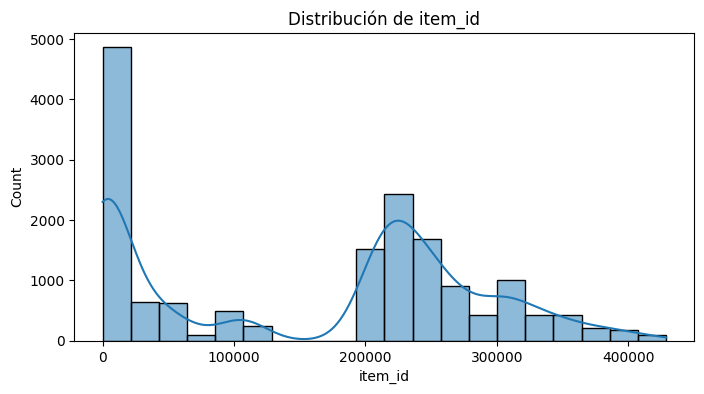

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


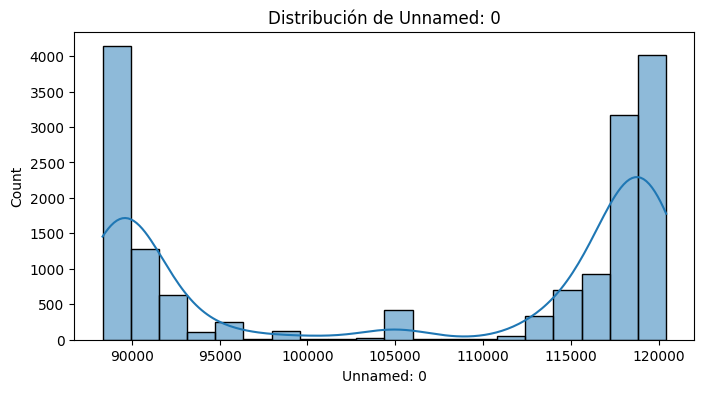

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


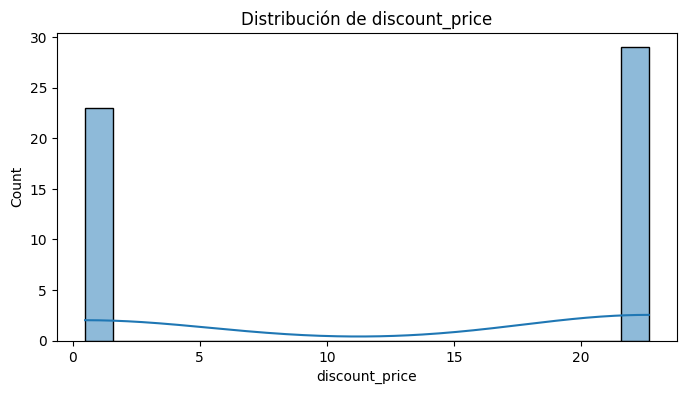

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


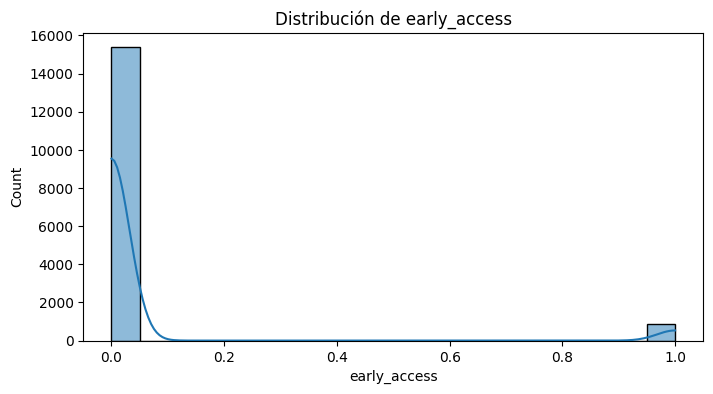

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


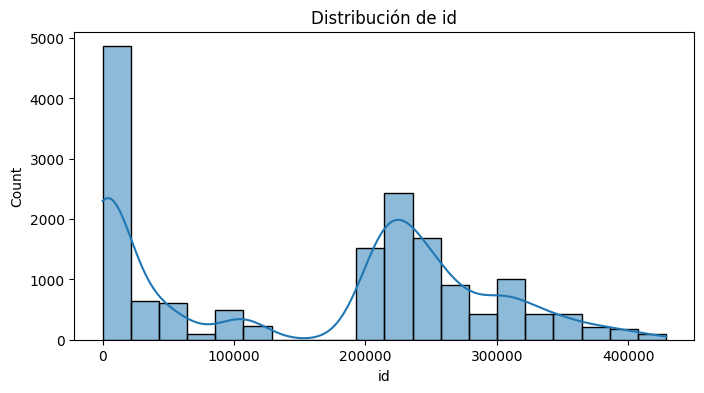

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


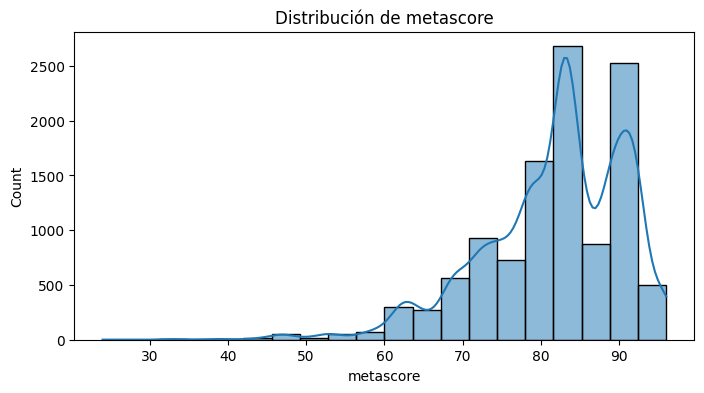

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


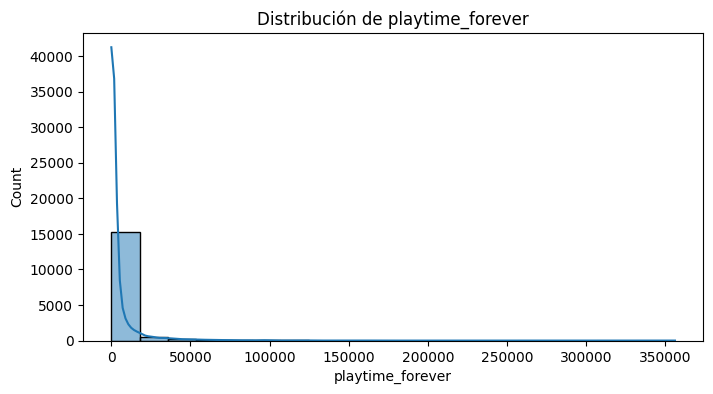

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

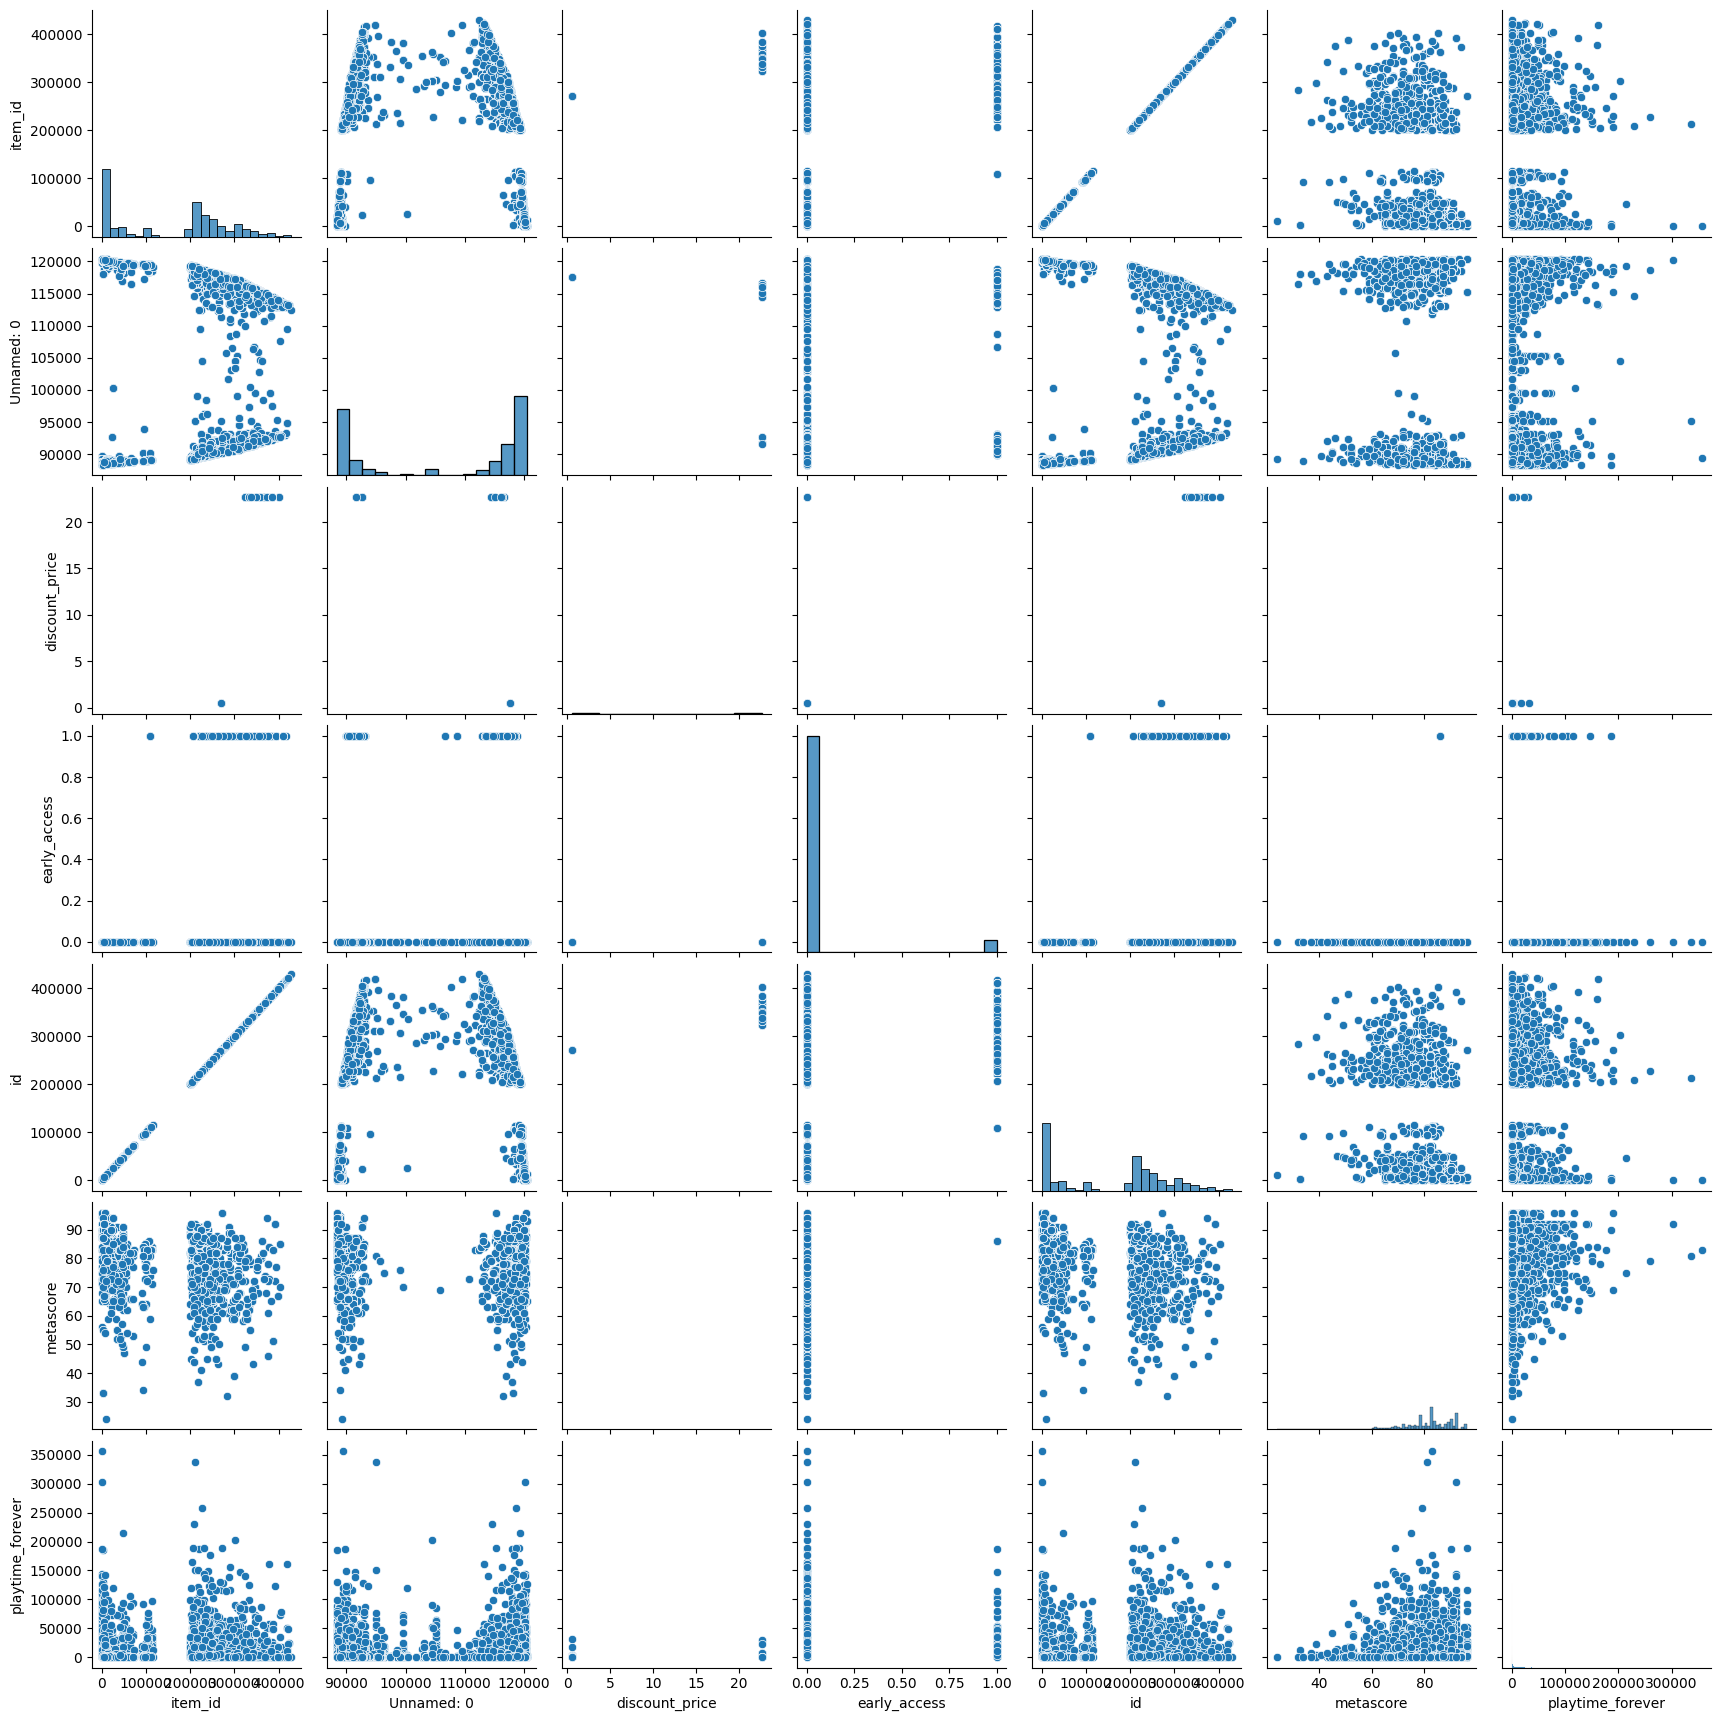

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


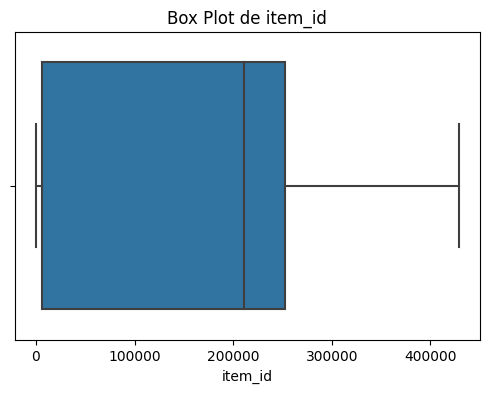

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


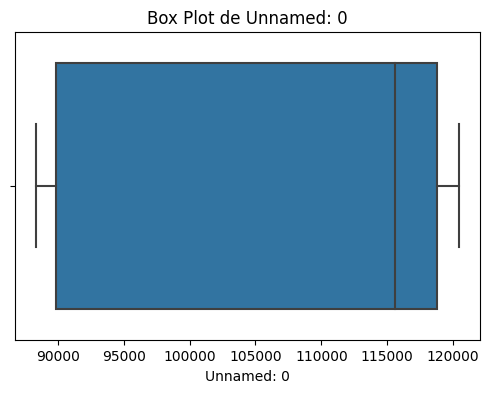

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


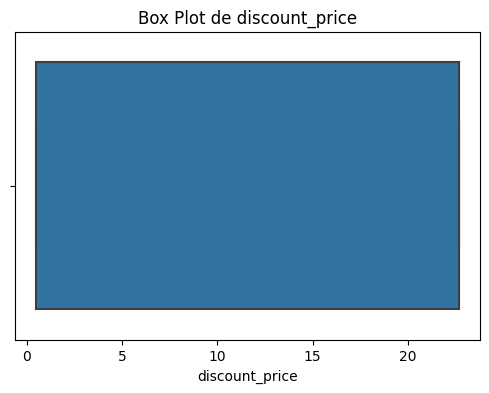

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


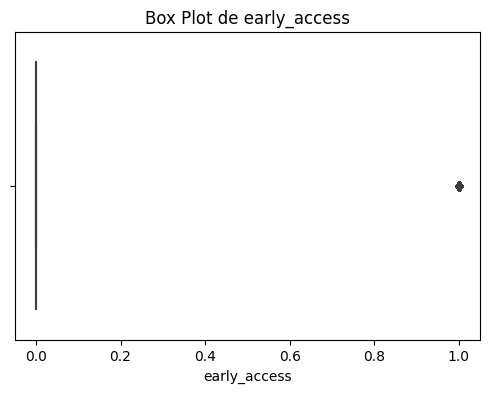

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


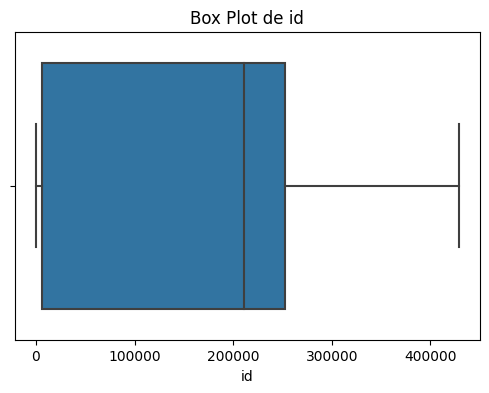

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


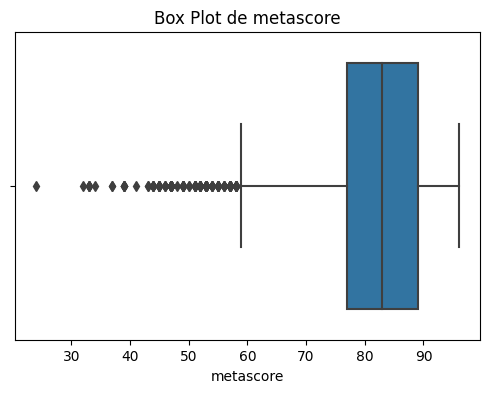

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


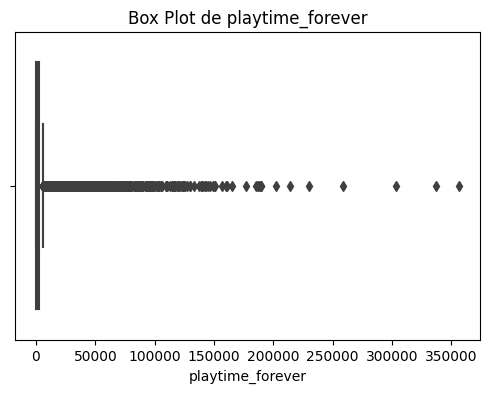

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


KeyboardInterrupt: 

<Figure size 800x400 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos (reemplaza 'tu_archivo.csv' con el nombre de tu archivo)
df = pd.read_csv('resultado_union_actualizado.csv')

# 1. Resumen Estadístico Inicial
# Obtener estadísticas descriptivas de las variables numéricas
summary_stats = df.describe()

# 2. Visualización de Datos
# Histogramas para variables numéricas
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Diagrama de dispersión entre dos variables numéricas
sns.pairplot(df[numeric_cols])
plt.show()

# 3. Identificación de Outliers
# Diagramas de caja (box plots) para variables numéricas
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot de {col}')
    plt.show()

# 4. Análisis de Variables Categóricas
# Gráfico de barras para variables categóricas
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=90)
    plt.show()

# 5. Nubes de Palabras
from wordcloud import WordCloud

# Crear una nube de palabras para los títulos
text = ' '.join(df['title'].dropna())  # Combinar títulos en un solo texto
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos')
plt.show()

# 6. Análisis Temporal
# Si tienes una columna de fecha, puedes realizar análisis temporal

# 7. Anomalías y Patrones Interesantes
# Busca patrones o valores inusuales

# 8. Pruebas Estadísticas
# Realiza pruebas estadísticas según tus hipótesis o preguntas

# 9. Segmentación y Agrupación
# Si es relevante, considera la segmentación de datos en grupos

# 10. Comunicación de Resultados
# Documenta y comunica tus hallazgos

# ¡Personaliza y amplía el análisis según tus necesidades!


In [57]:
print(df.head())


             user_id  item_id  recommend  \
0  76561197970982479   1250.0       True   
1            VVillis   1250.0       True   
2         jarrodtrim   1250.0       True   
3  76561198073784601   1250.0       True   
4  76561198084390807   1250.0       True   

                                              review fecha_convertida  \
0  Simple yet with great replayability. In my opi...       2011-11-05   
1  Amazing, Non-stop action of blowing stuff to b...       2015-03-30   
2  Compared to Left 4 Dead 2, this game REALLY gi...       2013-07-12   
3                                 Jogo â¥â¥â¥â¥.       2015-08-13   
4  cara nas imagens esse jogo da pouco de medo ma...       2014-04-05   

   Unnamed: 0             publisher      genres       app_name          title  \
0      119997  Tripwire Interactive  ['Action']  Killing Floor  Killing Floor   
1      119997  Tripwire Interactive  ['Action']  Killing Floor  Killing Floor   
2      119997  Tripwire Interactive  ['Action']  Kill

In [55]:
print(cosine_sim)


[[1.         1.         1.         ... 0.07265568 0.15765203 0.18679499]
 [1.         1.         1.         ... 0.07265568 0.15765203 0.18679499]
 [1.         1.         1.         ... 0.07265568 0.15765203 0.18679499]
 ...
 [0.07265568 0.07265568 0.07265568 ... 1.         0.18004256 0.12560535]
 [0.15765203 0.15765203 0.15765203 ... 0.18004256 1.         0.32688147]
 [0.18679499 0.18679499 0.18679499 ... 0.12560535 0.32688147 1.        ]]


In [4]:
print(datosr2.head())

AttributeError: 'list' object has no attribute 'head'

In [6]:
import pandas as pd

# Suponiendo que ya tienes un DataFrame llamado 'datosr'

# Convertir la columna 'items' de string a lista de diccionarios
datosr2['items'] = datosr2['items'].apply(eval)

# Extraer 'item_id' y 'playtime_forever' en nuevas columnas
datosr2['item_id'] = datosr2['items'].apply(lambda x: x[0]['item_id'])
datosr2['playtime_forever'] = datosr2['items'].apply(lambda x: x[0]['playtime_forever'])

# Eliminar la columna 'items' si ya no la necesitas
#datosr.drop(columns=['items'], inplace=True)

# Mostrar el DataFrame resultante
print(datosr2)


TypeError: eval() arg 1 must be a string, bytes or code object

In [7]:
import pandas as pd
import ast

# Suponiendo que ya tienes un DataFrame llamado 'datosr'

# Utilizar ast.literal_eval() para convertir la columna 'items' en listas de diccionarios
datosr2['items'] = datosr2['items'].apply(ast.literal_eval)

# Extraer 'item_id' y 'playtime_forever' en nuevas columnas
datosr2['item_id'] = datosr2['items'].apply(lambda x: x[0]['item_id'])
datosr2['playtime_forever'] = datosr2['items'].apply(lambda x: x[0]['playtime_forever'])

# Eliminar la columna 'items' si ya no la necesitas
#datosr.drop(columns=['items'], inplace=True)

# Mostrar el DataFrame resultante
print(datosr2)


ValueError: malformed node or string: [{'item_id': '10', 'item_name': 'Counter-Strike', 'playtime_forever': 6, 'playtime_2weeks': 0}, {'item_id': '20', 'item_name': 'Team Fortress Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '30', 'item_name': 'Day of Defeat', 'playtime_forever': 7, 'playtime_2weeks': 0}, {'item_id': '40', 'item_name': 'Deathmatch Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '50', 'item_name': 'Half-Life: Opposing Force', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '60', 'item_name': 'Ricochet', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '70', 'item_name': 'Half-Life', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '130', 'item_name': 'Half-Life: Blue Shift', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '300', 'item_name': 'Day of Defeat: Source', 'playtime_forever': 4733, 'playtime_2weeks': 0}, {'item_id': '240', 'item_name': 'Counter-Strike: Source', 'playtime_forever': 1853, 'playtime_2weeks': 0}, {'item_id': '3830', 'item_name': 'Psychonauts', 'playtime_forever': 333, 'playtime_2weeks': 0}, {'item_id': '2630', 'item_name': 'Call of Duty 2', 'playtime_forever': 75, 'playtime_2weeks': 0}, {'item_id': '3900', 'item_name': "Sid Meier's Civilization IV", 'playtime_forever': 338, 'playtime_2weeks': 0}, {'item_id': '34440', 'item_name': "Sid Meier's Civilization IV", 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '3920', 'item_name': "Sid Meier's Pirates!", 'playtime_forever': 2, 'playtime_2weeks': 0}, {'item_id': '6400', 'item_name': 'Joint Task Force', 'playtime_forever': 286, 'playtime_2weeks': 0}, {'item_id': '6910', 'item_name': 'Deus Ex: Game of the Year Edition', 'playtime_forever': 2685, 'playtime_2weeks': 0}, {'item_id': '7670', 'item_name': 'BioShock', 'playtime_forever': 633, 'playtime_2weeks': 0}, {'item_id': '409710', 'item_name': 'BioShock Remastered', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '220', 'item_name': 'Half-Life 2', 'playtime_forever': 696, 'playtime_2weeks': 0}, {'item_id': '320', 'item_name': 'Half-Life 2: Deathmatch', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '340', 'item_name': 'Half-Life 2: Lost Coast', 'playtime_forever': 37, 'playtime_2weeks': 0}, {'item_id': '360', 'item_name': 'Half-Life Deathmatch: Source', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '380', 'item_name': 'Half-Life 2: Episode One', 'playtime_forever': 168, 'playtime_2weeks': 0}, {'item_id': '400', 'item_name': 'Portal', 'playtime_forever': 173, 'playtime_2weeks': 0}, {'item_id': '420', 'item_name': 'Half-Life 2: Episode Two', 'playtime_forever': 323, 'playtime_2weeks': 0}, {'item_id': '9340', 'item_name': 'Company of Heroes: Opposing Fronts', 'playtime_forever': 692, 'playtime_2weeks': 0}, {'item_id': '228200', 'item_name': 'Company of Heroes (New Steam Version)', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '11450', 'item_name': 'Overlord', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '7940', 'item_name': 'Call of Duty 4: Modern Warfare', 'playtime_forever': 1185, 'playtime_2weeks': 0}, {'item_id': '4700', 'item_name': 'Medieval II: Total War', 'playtime_forever': 477, 'playtime_2weeks': 0}, {'item_id': '12900', 'item_name': 'Audiosurf', 'playtime_forever': 115, 'playtime_2weeks': 0}, {'item_id': '13250', 'item_name': 'Unreal Gold', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '16100', 'item_name': 'Virtual Villagers: A New Home', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '15700', 'item_name': "Oddworld: Abe's Oddysee", 'playtime_forever': 28, 'playtime_2weeks': 0}, {'item_id': '15710', 'item_name': "Oddworld: Abe's Exoddus", 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '17330', 'item_name': 'Crysis Warhead', 'playtime_forever': 31, 'playtime_2weeks': 0}, {'item_id': '17340', 'item_name': 'Crysis Wars', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '22000', 'item_name': 'World of Goo', 'playtime_forever': 195, 'playtime_2weeks': 0}, {'item_id': '500', 'item_name': 'Left 4 Dead', 'playtime_forever': 513, 'playtime_2weeks': 0}, {'item_id': '4560', 'item_name': 'Company of Heroes', 'playtime_forever': 1061, 'playtime_2weeks': 0}, {'item_id': '17460', 'item_name': 'Mass Effect', 'playtime_forever': 1613, 'playtime_2weeks': 0}, {'item_id': '10500', 'item_name': 'Empire: Total War', 'playtime_forever': 186, 'playtime_2weeks': 0}, {'item_id': '24740', 'item_name': 'Burnout Paradise: The Ultimate Box', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '22200', 'item_name': 'Zeno Clash', 'playtime_forever': 271, 'playtime_2weeks': 0}, {'item_id': '26800', 'item_name': 'Braid', 'playtime_forever': 445, 'playtime_2weeks': 0}, {'item_id': '1250', 'item_name': 'Killing Floor', 'playtime_forever': 10006, 'playtime_2weeks': 0}, {'item_id': '35420', 'item_name': 'Killing Floor Mod: Defence Alliance 2', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '3590', 'item_name': 'Plants vs. Zombies: Game of the Year', 'playtime_forever': 4413, 'playtime_2weeks': 0}, {'item_id': '8880', 'item_name': 'Freedom Force', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '8890', 'item_name': 'Freedom Force vs. the 3rd Reich', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '23120', 'item_name': 'Droplitz', 'playtime_forever': 53, 'playtime_2weeks': 0}, {'item_id': '35700', 'item_name': 'Trine', 'playtime_forever': 199, 'playtime_2weeks': 0}, {'item_id': '10140', 'item_name': '3D Ultra Minigolf Adventures Deluxe', 'playtime_forever': 25, 'playtime_2weeks': 0}, {'item_id': '35010', 'item_name': 'Batman: Arkham Asylum', 'playtime_forever': 570, 'playtime_2weeks': 0}, {'item_id': '35140', 'item_name': 'Batman: Arkham Asylum GOTY Edition', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '29180', 'item_name': 'Osmos', 'playtime_forever': 940, 'playtime_2weeks': 0}, {'item_id': '15520', 'item_name': 'AaAaAA!!! - A Reckless Disregard for Gravity', 'playtime_forever': 110, 'playtime_2weeks': 0}, {'item_id': '32370', 'item_name': 'STAR WARSâ\x84¢: Knights of the Old Republicâ\x84¢', 'playtime_forever': 5, 'playtime_2weeks': 0}, {'item_id': '37700', 'item_name': 'Darkest of Days', 'playtime_forever': 782, 'playtime_2weeks': 0}, {'item_id': '6020', 'item_name': 'STAR WARSâ\x84¢ Jedi Knight: Jedi Academyâ\x84¢', 'playtime_forever': 77, 'playtime_2weeks': 0}, {'item_id': '24860', 'item_name': 'Battlefield 2', 'playtime_forever': 437, 'playtime_2weeks': 0}, {'item_id': '39530', 'item_name': 'Painkiller: Black Edition', 'playtime_forever': 503, 'playtime_2weeks': 0}, {'item_id': '550', 'item_name': 'Left 4 Dead 2', 'playtime_forever': 1474, 'playtime_2weeks': 0}, {'item_id': '223530', 'item_name': 'Left 4 Dead 2 Beta', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '8980', 'item_name': 'Borderlands', 'playtime_forever': 3061, 'playtime_2weeks': 0}, {'item_id': '41500', 'item_name': 'Torchlight', 'playtime_forever': 536, 'playtime_2weeks': 0}, {'item_id': '20900', 'item_name': 'The Witcher: Enhanced Edition', 'playtime_forever': 139, 'playtime_2weeks': 0}, {'item_id': '10180', 'item_name': 'Call of Duty: Modern Warfare 2', 'playtime_forever': 1886, 'playtime_2weeks': 0}, {'item_id': '10190', 'item_name': 'Call of Duty: Modern Warfare 2 - Multiplayer', 'playtime_forever': 1784, 'playtime_2weeks': 0}, {'item_id': '17450', 'item_name': 'Dragon Age: Origins', 'playtime_forever': 4431, 'playtime_2weeks': 0}, {'item_id': '3170', 'item_name': "King's Bounty: Armored Princess", 'playtime_forever': 1021, 'playtime_2weeks': 0}, {'item_id': '25900', 'item_name': "King's Bounty: The Legend", 'playtime_forever': 1389, 'playtime_2weeks': 0}, {'item_id': '31410', 'item_name': 'Zombie Driver', 'playtime_forever': 95, 'playtime_2weeks': 0}, {'item_id': '24980', 'item_name': 'Mass Effect 2', 'playtime_forever': 5001, 'playtime_2weeks': 0}, {'item_id': '8850', 'item_name': 'BioShock 2', 'playtime_forever': 1504, 'playtime_2weeks': 0}, {'item_id': '409720', 'item_name': 'BioShock 2 Remastered', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '46000', 'item_name': 'Bob Came in Pieces', 'playtime_forever': 11, 'playtime_2weeks': 0}, {'item_id': '33230', 'item_name': "Assassin's Creed II", 'playtime_forever': 1636, 'playtime_2weeks': 0}, {'item_id': '20820', 'item_name': 'Shatter', 'playtime_forever': 46, 'playtime_2weeks': 0}, {'item_id': '47700', 'item_name': 'Command and Conquer 4: Tiberian Twilight', 'playtime_forever': 85, 'playtime_2weeks': 0}, {'item_id': '24960', 'item_name': 'Battlefield: Bad Company 2', 'playtime_forever': 5716, 'playtime_2weeks': 0}, {'item_id': '43110', 'item_name': 'Metro 2033', 'playtime_forever': 834, 'playtime_2weeks': 0}, {'item_id': '8190', 'item_name': 'Just Cause 2', 'playtime_forever': 3083, 'playtime_2weeks': 0}, {'item_id': '49600', 'item_name': 'Beat Hazard', 'playtime_forever': 127, 'playtime_2weeks': 0}, {'item_id': '31220', 'item_name': 'Sam & Max 301: The Penal Zone', 'playtime_forever': 71, 'playtime_2weeks': 0}, {'item_id': '31230', 'item_name': 'Sam & Max 302: The Tomb of Sammun-Mak', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '31240', 'item_name': "Sam & Max 303: They Stole Max's Brain!", 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '31250', 'item_name': 'Sam & Max 304: Beyond the Alley of the Dolls', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '31260', 'item_name': 'Sam & Max 305: The City that Dares not Sleep', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '21090', 'item_name': 'F.E.A.R.', 'playtime_forever': 585, 'playtime_2weeks': 0}, {'item_id': '21110', 'item_name': 'F.E.A.R.: Extraction Point', 'playtime_forever': 146, 'playtime_2weeks': 0}, {'item_id': '21120', 'item_name': 'F.E.A.R.: Perseus Mandate', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '49400', 'item_name': 'Magic: The Gathering - Duels of the Planeswalkers', 'playtime_forever': 32, 'playtime_2weeks': 0}, {'item_id': '33910', 'item_name': 'Arma 2', 'playtime_forever': 3, 'playtime_2weeks': 0}, {'item_id': '33930', 'item_name': 'Arma 2: Operation Arrowhead', 'playtime_forever': 3, 'playtime_2weeks': 0}, {'item_id': '219540', 'item_name': 'Arma 2: Operation Arrowhead Beta (Obsolete)', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '17410', 'item_name': "Mirror's Edge", 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '205790', 'item_name': 'Dota 2 Test', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '50130', 'item_name': 'Mafia II', 'playtime_forever': 707, 'playtime_2weeks': 0}, {'item_id': '62100', 'item_name': 'Chime', 'playtime_forever': 50, 'playtime_2weeks': 0}, {'item_id': '31280', 'item_name': 'Poker Night at the Inventory', 'playtime_forever': 206, 'playtime_2weeks': 0}, {'item_id': '57300', 'item_name': 'Amnesia: The Dark Descent', 'playtime_forever': 12, 'playtime_2weeks': 0}, {'item_id': '21970', 'item_name': 'R.U.S.E', 'playtime_forever': 64, 'playtime_2weeks': 0}, {'item_id': '8930', 'item_name': "Sid Meier's Civilization V", 'playtime_forever': 10345, 'playtime_2weeks': 0}, {'item_id': '41000', 'item_name': 'Serious Sam HD: The First Encounter', 'playtime_forever': 369, 'playtime_2weeks': 0}, {'item_id': '41050', 'item_name': 'Serious Sam Classic: The First Encounter', 'playtime_forever': 76, 'playtime_2weeks': 0}, {'item_id': '41060', 'item_name': 'Serious Sam Classic: The Second Encounter', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '227780', 'item_name': 'Serious Sam Classics: Revolution', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '18040', 'item_name': 'DeathSpank', 'playtime_forever': 594, 'playtime_2weeks': 0}, {'item_id': '22380', 'item_name': 'Fallout: New Vegas', 'playtime_forever': 43, 'playtime_2weeks': 0}, {'item_id': '42700', 'item_name': 'Call of Duty: Black Ops', 'playtime_forever': 966, 'playtime_2weeks': 0}, {'item_id': '42710', 'item_name': 'Call of Duty: Black Ops - Multiplayer', 'playtime_forever': 2452, 'playtime_2weeks': 0}, {'item_id': '62000', 'item_name': 'Flight Control HD', 'playtime_forever': 25, 'playtime_2weeks': 0}, {'item_id': '40800', 'item_name': 'Super Meat Boy', 'playtime_forever': 119, 'playtime_2weeks': 0}, {'item_id': '9500', 'item_name': 'Gish', 'playtime_forever': 6, 'playtime_2weeks': 0}, {'item_id': '18700', 'item_name': 'And Yet It Moves', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '31270', 'item_name': 'Puzzle Agent', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '58200', 'item_name': 'Jolly Rover', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '70400', 'item_name': "Recettear: An Item Shop's Tale", 'playtime_forever': 537, 'playtime_2weeks': 0}, {'item_id': '41300', 'item_name': 'Altitude', 'playtime_forever': 50, 'playtime_2weeks': 0}, {'item_id': '41800', 'item_name': 'Gratuitous Space Battles', 'playtime_forever': 149, 'playtime_2weeks': 0}, {'item_id': '42500', 'item_name': 'DogFighter', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '49900', 'item_name': 'Plain Sight', 'playtime_forever': 23, 'playtime_2weeks': 0}, {'item_id': '55000', 'item_name': 'Flotilla', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '34330', 'item_name': 'Total War: SHOGUN 2', 'playtime_forever': 1538, 'playtime_2weeks': 0}, {'item_id': '63200', 'item_name': 'Monday Night Combat', 'playtime_forever': 573, 'playtime_2weeks': 0}, {'item_id': '99810', 'item_name': 'Bulletstorm', 'playtime_forever': 2, 'playtime_2weeks': 0}, {'item_id': '620', 'item_name': 'Portal 2', 'playtime_forever': 887, 'playtime_2weeks': 0}, {'item_id': '42910', 'item_name': 'Magicka', 'playtime_forever': 588, 'playtime_2weeks': 0}, {'item_id': '15500', 'item_name': 'The Wonderful End of the World', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '15540', 'item_name': '1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby)', 'playtime_forever': 4, 'playtime_2weeks': 0}, {'item_id': '18500', 'item_name': 'Defense Grid: The Awakening', 'playtime_forever': 126, 'playtime_2weeks': 0}, {'item_id': '26500', 'item_name': 'Cogs', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '35460', 'item_name': 'The Ball', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '38700', 'item_name': 'Toki Tori', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '38720', 'item_name': 'RUSH', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '63700', 'item_name': 'BIT.TRIP BEAT', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '280', 'item_name': 'Half-Life: Source', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '20920', 'item_name': 'The Witcher 2: Assassins of Kings Enhanced Edition', 'playtime_forever': 1343, 'playtime_2weeks': 0}, {'item_id': '105600', 'item_name': 'Terraria', 'playtime_forever': 772, 'playtime_2weeks': 0}, {'item_id': '98200', 'item_name': 'Frozen Synapse', 'playtime_forever': 9, 'playtime_2weeks': 0}, {'item_id': '4500', 'item_name': 'S.T.A.L.K.E.R.: Shadow of Chernobyl', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '4540', 'item_name': 'Titan Quest', 'playtime_forever': 3, 'playtime_2weeks': 0}, {'item_id': '4550', 'item_name': 'Titan Quest: Immortal Throne', 'playtime_forever': 76, 'playtime_2weeks': 0}, {'item_id': '9480', 'item_name': 'Saints Row 2', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '15620', 'item_name': 'WarhammerÂ® 40,000â\x84¢: Dawn of WarÂ® II', 'playtime_forever': 2085, 'playtime_2weeks': 0}, {'item_id': '20500', 'item_name': 'Red Faction: Guerrilla Steam Edition', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '20570', 'item_name': 'WarhammerÂ® 40,000â\x84¢: Dawn of WarÂ® II - Chaos Risingâ\x84¢', 'playtime_forever': 69, 'playtime_2weeks': 0}, {'item_id': '50620', 'item_name': 'Darksiders', 'playtime_forever': 101, 'playtime_2weeks': 0}, {'item_id': '55100', 'item_name': 'Homefront', 'playtime_forever': 51, 'playtime_2weeks': 0}, {'item_id': '55140', 'item_name': 'MX vs. ATV Reflex', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '56400', 'item_name': 'WarhammerÂ® 40,000â\x84¢: Dawn of WarÂ® II â\x80\x93 Retributionâ\x84¢', 'playtime_forever': 678, 'playtime_2weeks': 0}, {'item_id': '475150', 'item_name': 'Titan Quest Anniversary Edition', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '96100', 'item_name': 'Defy Gravity', 'playtime_forever': 9, 'playtime_2weeks': 0}, {'item_id': '35450', 'item_name': 'Rising Storm/Red Orchestra 2 Multiplayer', 'playtime_forever': 14194, 'playtime_2weeks': 0}, {'item_id': '236830', 'item_name': 'Red Orchestra 2: Heroes of Stalingrad - Single Player', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '72850', 'item_name': 'The Elder Scrolls V: Skyrim', 'playtime_forever': 2512, 'playtime_2weeks': 0}, {'item_id': '107100', 'item_name': 'Bastion', 'playtime_forever': 640, 'playtime_2weeks': 0}, {'item_id': '57690', 'item_name': 'Tropico 4', 'playtime_forever': 1815, 'playtime_2weeks': 0}, {'item_id': '91310', 'item_name': 'Dead Island', 'playtime_forever': 2078, 'playtime_2weeks': 0}, {'item_id': '113200', 'item_name': 'The Binding of Isaac', 'playtime_forever': 1494, 'playtime_2weeks': 0}, {'item_id': '65800', 'item_name': 'Dungeon Defenders', 'playtime_forever': 130, 'playtime_2weeks': 0}, {'item_id': '9200', 'item_name': 'RAGE', 'playtime_forever': 653, 'playtime_2weeks': 0}, {'item_id': '41070', 'item_name': 'Serious Sam 3: BFE', 'playtime_forever': 716, 'playtime_2weeks': 0}, {'item_id': '48950', 'item_name': 'Greed Corp', 'playtime_forever': 72, 'playtime_2weeks': 0}, {'item_id': '92800', 'item_name': 'SpaceChem', 'playtime_forever': 262, 'playtime_2weeks': 0}, {'item_id': '104700', 'item_name': 'Super Monday Night Combat', 'playtime_forever': 44, 'playtime_2weeks': 0}, {'item_id': '203770', 'item_name': 'Crusader Kings II', 'playtime_forever': 18, 'playtime_2weeks': 0}, {'item_id': '203810', 'item_name': 'Dear Esther', 'playtime_forever': 86, 'playtime_2weeks': 0}, {'item_id': '110800', 'item_name': 'L.A. Noire', 'playtime_forever': 1204, 'playtime_2weeks': 0}, {'item_id': '207610', 'item_name': 'The Walking Dead', 'playtime_forever': 798, 'playtime_2weeks': 0}, {'item_id': '98300', 'item_name': 'Toy Soldiers', 'playtime_forever': 110, 'playtime_2weeks': 0}, {'item_id': '50300', 'item_name': 'Spec Ops: The Line', 'playtime_forever': 296, 'playtime_2weeks': 0}, {'item_id': '204300', 'item_name': 'Awesomenauts', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '1700', 'item_name': 'Arx Fatalis', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '205100', 'item_name': 'Dishonored', 'playtime_forever': 1429, 'playtime_2weeks': 0}, {'item_id': '211120', 'item_name': 'The Political Machine', 'playtime_forever': 1, 'playtime_2weeks': 0}, {'item_id': '730', 'item_name': 'Counter-Strike: Global Offensive', 'playtime_forever': 23532, 'playtime_2weeks': 0}, {'item_id': '49520', 'item_name': 'Borderlands 2', 'playtime_forever': 1303, 'playtime_2weeks': 0}, {'item_id': '200260', 'item_name': 'Batman: Arkham City GOTY', 'playtime_forever': 100, 'playtime_2weeks': 0}, {'item_id': '212680', 'item_name': 'FTL: Faster Than Light', 'playtime_forever': 500, 'playtime_2weeks': 0}, {'item_id': '200710', 'item_name': 'Torchlight II', 'playtime_forever': 459, 'playtime_2weeks': 0}, {'item_id': '219150', 'item_name': 'Hotline Miami', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '215510', 'item_name': 'Rocketbirds: Hardboiled Chicken', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '8870', 'item_name': 'BioShock Infinite', 'playtime_forever': 2084, 'playtime_2weeks': 0}, {'item_id': '200510', 'item_name': 'XCOM: Enemy Unknown', 'playtime_forever': 3478, 'playtime_2weeks': 0}, {'item_id': '220240', 'item_name': 'Far CryÂ® 3', 'playtime_forever': 182, 'playtime_2weeks': 0}, {'item_id': '218680', 'item_name': 'Scribblenauts Unlimited', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '228280', 'item_name': "Baldur's Gate: Enhanced Edition", 'playtime_forever': 905, 'playtime_2weeks': 0}, {'item_id': '212070', 'item_name': 'Star Conflict', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '218230', 'item_name': 'PlanetSide 2', 'playtime_forever': 51, 'playtime_2weeks': 0}, {'item_id': '236390', 'item_name': 'War Thunder', 'playtime_forever': 50, 'playtime_2weeks': 0}, {'item_id': '3483', 'item_name': 'Peggle Extreme', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '203160', 'item_name': 'Tomb Raider', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '227080', 'item_name': 'Papo & Yo', 'playtime_forever': 81, 'playtime_2weeks': 0}, {'item_id': '233450', 'item_name': 'Prison Architect', 'playtime_forever': 24, 'playtime_2weeks': 0}, {'item_id': '43160', 'item_name': 'Metro: Last Light', 'playtime_forever': 712, 'playtime_2weeks': 0}, {'item_id': '219740', 'item_name': "Don't Starve", 'playtime_forever': 139, 'playtime_2weeks': 0}, {'item_id': '322330', 'item_name': "Don't Starve Together", 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '222730', 'item_name': 'Reus', 'playtime_forever': 319, 'playtime_2weeks': 0}, {'item_id': '241600', 'item_name': 'Rogue Legacy', 'playtime_forever': 73, 'playtime_2weeks': 0}, {'item_id': '238930', 'item_name': '7 Grand Steps, Step 1: What Ancients Begat', 'playtime_forever': 159, 'playtime_2weeks': 0}, {'item_id': '217140', 'item_name': 'Rise of the Triad', 'playtime_forever': 199, 'playtime_2weeks': 0}, {'item_id': '39140', 'item_name': 'FINAL FANTASY VII', 'playtime_forever': 2896, 'playtime_2weeks': 0}, {'item_id': '225080', 'item_name': 'Brothers - A Tale of Two Sons', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '239030', 'item_name': 'Papers, Please', 'playtime_forever': 194, 'playtime_2weeks': 0}, {'item_id': '248820', 'item_name': 'Risk of Rain', 'playtime_forever': 272, 'playtime_2weeks': 0}, {'item_id': '239350', 'item_name': 'Spelunky', 'playtime_forever': 458, 'playtime_2weeks': 0}, {'item_id': '218620', 'item_name': 'PAYDAY 2', 'playtime_forever': 574, 'playtime_2weeks': 0}, {'item_id': '206420', 'item_name': 'Saints Row IV', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '236850', 'item_name': 'Europa Universalis IV', 'playtime_forever': 89, 'playtime_2weeks': 0}, {'item_id': '47790', 'item_name': 'Medal of Honor(TM) Single Player', 'playtime_forever': 230, 'playtime_2weeks': 0}, {'item_id': '47830', 'item_name': 'Medal of Honor(TM) Multiplayer', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '250320', 'item_name': 'The Wolf Among Us', 'playtime_forever': 500, 'playtime_2weeks': 0}, {'item_id': '250900', 'item_name': 'The Binding of Isaac: Rebirth', 'playtime_forever': 329, 'playtime_2weeks': 0}, {'item_id': '204450', 'item_name': 'Call of Juarez Gunslinger', 'playtime_forever': 241, 'playtime_2weeks': 0}, {'item_id': '233270', 'item_name': 'Far CryÂ® 3 Blood Dragon', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '251990', 'item_name': 'Long Live The Queen', 'playtime_forever': 135, 'playtime_2weeks': 0}, {'item_id': '253980', 'item_name': 'Enclave', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '236450', 'item_name': 'PAC-MAN Championship Edition DX+', 'playtime_forever': 154, 'playtime_2weeks': 0}, {'item_id': '242050', 'item_name': "Assassin's Creed IV Black Flag", 'playtime_forever': 1377, 'playtime_2weeks': 0}, {'item_id': '257350', 'item_name': "Baldur's Gate II: Enhanced Edition", 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '213670', 'item_name': 'South Parkâ\x84¢: The Stick of Truthâ\x84¢', 'playtime_forever': 121, 'playtime_2weeks': 0}, {'item_id': '238010', 'item_name': "Deus Ex: Human Revolution - Director's Cut", 'playtime_forever': 2176, 'playtime_2weeks': 0}, {'item_id': '245470', 'item_name': 'Democracy 3', 'playtime_forever': 246, 'playtime_2weeks': 0}, {'item_id': '221910', 'item_name': 'The Stanley Parable', 'playtime_forever': 157, 'playtime_2weeks': 0}, {'item_id': '260230', 'item_name': 'Valiant Hearts: The Great Warâ\x84¢ / Soldats Inconnus : MÃ©moires de la Grande Guerreâ\x84¢', 'playtime_forever': 467, 'playtime_2weeks': 0}, {'item_id': '238430', 'item_name': 'Contagion', 'playtime_forever': 77, 'playtime_2weeks': 0}, {'item_id': '261030', 'item_name': 'The Walking Dead: Season Two', 'playtime_forever': 567, 'playtime_2weeks': 0}, {'item_id': '261570', 'item_name': 'Ori and the Blind Forest', 'playtime_forever': 39, 'playtime_2weeks': 0}, {'item_id': '263980', 'item_name': 'Out There Somewhere', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '39150', 'item_name': 'FINAL FANTASY VIII', 'playtime_forever': 15, 'playtime_2weeks': 0}, {'item_id': '230230', 'item_name': 'Divinity: Original Sin (Classic)', 'playtime_forever': 522, 'playtime_2weeks': 0}, {'item_id': '373420', 'item_name': 'Divinity: Original Sin Enhanced Edition', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '232790', 'item_name': 'Broken Age', 'playtime_forever': 216, 'playtime_2weeks': 0}, {'item_id': '237990', 'item_name': 'The Banner Saga', 'playtime_forever': 19, 'playtime_2weeks': 0}, {'item_id': '273620', 'item_name': 'Freespace 2', 'playtime_forever': 848, 'playtime_2weeks': 0}, {'item_id': '222880', 'item_name': 'Insurgency', 'playtime_forever': 3031, 'playtime_2weeks': 0}, {'item_id': '225840', 'item_name': 'Sven Co-op', 'playtime_forever': 26, 'playtime_2weeks': 0}, {'item_id': '222900', 'item_name': 'Dead Island: Epidemic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '280220', 'item_name': 'Creeper World 3: Arc Eternal', 'playtime_forever': 941, 'playtime_2weeks': 0}, {'item_id': '236430', 'item_name': 'DARK SOULSâ\x84¢ II', 'playtime_forever': 592, 'playtime_2weeks': 0}, {'item_id': '201810', 'item_name': 'Wolfenstein: The New Order', 'playtime_forever': 599, 'playtime_2weeks': 0}, {'item_id': '294860', 'item_name': 'Valkyria Chroniclesâ\x84¢', 'playtime_forever': 1735, 'playtime_2weeks': 0}, {'item_id': '295690', 'item_name': 'PARTICLE MACE', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '238460', 'item_name': 'BattleBlock Theater', 'playtime_forever': 407, 'playtime_2weeks': 0}, {'item_id': '237930', 'item_name': 'Transistor', 'playtime_forever': 154, 'playtime_2weeks': 0}, {'item_id': '301480', 'item_name': 'GEARCRACK Arena', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '303390', 'item_name': 'Dead Bits', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '306660', 'item_name': 'Ultimate General: Gettysburg', 'playtime_forever': 1245, 'playtime_2weeks': 0}, {'item_id': '316790', 'item_name': 'Grim Fandango Remastered', 'playtime_forever': 42, 'playtime_2weeks': 0}, {'item_id': '318430', 'item_name': 'Squishy the Suicidal Pig', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '241930', 'item_name': 'Middle-earth: Shadow of Mordor', 'playtime_forever': 889, 'playtime_2weeks': 0}, {'item_id': '328080', 'item_name': 'Retro-Pixel Castles', 'playtime_forever': 5, 'playtime_2weeks': 0}, {'item_id': '282070', 'item_name': 'This War of Mine', 'playtime_forever': 3, 'playtime_2weeks': 0}, {'item_id': '333930', 'item_name': 'Dirty Bomb', 'playtime_forever': 2782, 'playtime_2weeks': 0}, {'item_id': '334120', 'item_name': 'Armikrog', 'playtime_forever': 109, 'playtime_2weeks': 0}, {'item_id': '257510', 'item_name': 'The Talos Principle', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '319630', 'item_name': 'Life Is Strangeâ\x84¢', 'playtime_forever': 37, 'playtime_2weeks': 0}, {'item_id': '346010', 'item_name': 'Besiege', 'playtime_forever': 464, 'playtime_2weeks': 0}, {'item_id': '255710', 'item_name': 'Cities: Skylines', 'playtime_forever': 246, 'playtime_2weeks': 0}, {'item_id': '232090', 'item_name': 'Killing Floor 2', 'playtime_forever': 6494, 'playtime_2weeks': 0}, {'item_id': '232150', 'item_name': 'Killing Floor 2 - SDK', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '377160', 'item_name': 'Fallout 4', 'playtime_forever': 2001, 'playtime_2weeks': 0}, {'item_id': '340170', 'item_name': 'FINAL FANTASY TYPE-0 HD', 'playtime_forever': 170, 'playtime_2weeks': 0}, {'item_id': '391540', 'item_name': 'Undertale', 'playtime_forever': 395, 'playtime_2weeks': 0}, {'item_id': '396660', 'item_name': 'Tahira: Echoes of the Astral Empire', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '337000', 'item_name': 'Deus Ex: Mankind Dividedâ\x84¢', 'playtime_forever': 1159, 'playtime_2weeks': 0}, {'item_id': '368230', 'item_name': 'Kingdom: Classic', 'playtime_forever': 83, 'playtime_2weeks': 0}, {'item_id': '496300', 'item_name': 'Kingdom: New Lands', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '231430', 'item_name': 'Company of Heroes 2', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '289130', 'item_name': 'Endless Legend', 'playtime_forever': 593, 'playtime_2weeks': 0}, {'item_id': '268500', 'item_name': 'XCOM 2', 'playtime_forever': 1495, 'playtime_2weeks': 0}, {'item_id': '461640', 'item_name': 'Sins Of The Demon RPG', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '379720', 'item_name': 'DOOM', 'playtime_forever': 793, 'playtime_2weeks': 0}, {'item_id': '273350', 'item_name': 'Evolve Stage 2', 'playtime_forever': 58, 'playtime_2weeks': 0}]

In [24]:
print(datosr2[items])

NameError: name 'items' is not defined

In [10]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado "datosr2"
# Puedes eliminar la columna "user_url" de la siguiente manera:
datosr2 = datosr2.drop("user_url", axis=1)

# El parámetro "axis=1" indica que quieres eliminar una columna (1 para columnas, 0 para filas).

# Si deseas modificar "datosr2" directamente sin crear una nueva variable, puedes hacerlo así:
# datosr2.drop("user_url", axis=1, inplace=True)


In [11]:
datosr2

,user_id,items_count,steam_id,items
0,76561197970982479,277,76561197970982479,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...
88305,76561198323066619,22,76561198323066619,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,[]
88308,76561198329548331,7,76561198329548331,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [12]:
datosr2.to_csv('usuarios_items.csv', index=False)

In [18]:
from textblob import TextBlob
import pandas as pd

# Definir una función para realizar el análisis de sentimiento
def analyze_sentiment(review):
    analysis = TextBlob(str(review))  # Asegúrate de que review sea una cadena de texto
    if analysis.sentiment.polarity < 0:
        return 0  # Negativo
    elif analysis.sentiment.polarity == 0:
        return 1  # Neutral
    else:
        return 2  # Positivo

# Cargar el conjunto de datos en un DataFrame
df_nuevo = pd.read_csv('usuario_reviews.csv')  # Reemplaza 'tu_archivo.csv' con tu archivo real

# Aplicar la función a cada revisión individual y crear la nueva columna 'sentiment_analysis'
df_nuevo['sentiment_analysis'] = df_nuevo['reviews'].apply(analyze_sentiment)

# Guardar el DataFrame actualizado en un nuevo archivo CSV si es necesario
df_nuevo.to_csv('senti2.csv', index=False)

In [19]:
df_nuevo

,user_id,reviews,sentiment_analysis
0,76561197970982479,"[{'funny': '', 'posted': 'Posted November 5, 2...",2
1,js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014...",2
2,evcentric,"[{'funny': '', 'posted': 'Posted February 3.',...",2
3,doctr,"[{'funny': '', 'posted': 'Posted October 14, 2...",2
4,maplemage,"[{'funny': '3 people found this review funny',...",2
...,...,...,...
25794,76561198306599751,"[{'funny': '', 'posted': 'Posted May 31.', 'la...",2
25795,Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l...",2
25796,76561198310819422,"[{'funny': '1 person found this review funny',...",2
25797,76561198312638244,"[{'funny': '', 'posted': 'Posted July 21.', 'l...",2


In [20]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Cargar tu conjunto de datos
df = pd.read_csv('usuario_reviews.csv')  # Asegúrate de proporcionar la ruta correcta al archivo

# Crear una instancia del analizador VADER
analyzer = SentimentIntensityAnalyzer()

# Función para analizar el sentimiento de un texto
def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Aplicar el análisis de sentimientos a la columna "reviews" y crear nuevas columnas con los resultados
df['sentiment_scores'] = df['reviews'].apply(analyze_sentiment)

# Extraer los puntajes de sentimiento en columnas separadas
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['positive_score'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['negative_score'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['neutral_score'] = df['sentiment_scores'].apply(lambda x: x['neu'])

# Guardar el DataFrame actualizado en un nuevo archivo CSV si es necesario
df.to_csv('usuario_reviews_con_sentimiento10.csv', index=False)


In [21]:
df

,user_id,reviews,sentiment_scores,compound_score,positive_score,negative_score,neutral_score
0,76561197970982479,"[{'funny': '', 'posted': 'Posted November 5, 2...","{'neg': 0.016, 'neu': 0.721, 'pos': 0.263, 'co...",0.9847,0.263,0.016,0.721
1,js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014...","{'neg': 0.041, 'neu': 0.675, 'pos': 0.284, 'co...",0.9984,0.284,0.041,0.675
2,evcentric,"[{'funny': '', 'posted': 'Posted February 3.',...","{'neg': 0.074, 'neu': 0.593, 'pos': 0.333, 'co...",0.9969,0.333,0.074,0.593
3,doctr,"[{'funny': '', 'posted': 'Posted October 14, 2...","{'neg': 0.034, 'neu': 0.687, 'pos': 0.28, 'com...",0.9990,0.280,0.034,0.687
4,maplemage,"[{'funny': '3 people found this review funny',...","{'neg': 0.049, 'neu': 0.454, 'pos': 0.497, 'co...",0.9992,0.497,0.049,0.454
...,...,...,...,...,...,...,...
25794,76561198306599751,"[{'funny': '', 'posted': 'Posted May 31.', 'la...","{'neg': 0.089, 'neu': 0.558, 'pos': 0.352, 'co...",0.9595,0.352,0.089,0.558
25795,Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l...","{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'comp...",0.9153,0.301,0.000,0.699
25796,76561198310819422,"[{'funny': '1 person found this review funny',...","{'neg': 0.0, 'neu': 0.55, 'pos': 0.45, 'compou...",0.9501,0.450,0.000,0.550
25797,76561198312638244,"[{'funny': '', 'posted': 'Posted July 21.', 'l...","{'neg': 0.015, 'neu': 0.695, 'pos': 0.29, 'com...",0.9961,0.290,0.015,0.695


In [22]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Cargar tu conjunto de datos
df = pd.read_csv('usuario_reviews.csv')  # Asegúrate de proporcionar la ruta correcta al archivo

# Crear una instancia del analizador VADER
analyzer = SentimentIntensityAnalyzer()

# Función para analizar el sentimiento de un texto y asignar valores numéricos
def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    
    # Asignar valores numéricos basados en el sentimiento compuesto
    if sentiment['compound'] >= 0.05:
        return 2  # Positivo
    elif sentiment['compound'] <= -0.05:
        return 0  # Malo
    else:
        return 1  # Neutral

# Aplicar el análisis de sentimientos y asignación de valores numéricos a la columna "reviews"
df['sentiment_numeric'] = df['reviews'].apply(analyze_sentiment)

# Guardar el DataFrame actualizado en un nuevo archivo CSV si es necesario
df.to_csv('usuario_reviews_con_sentimiento11.csv', index=False)


In [23]:
df

,user_id,reviews,sentiment_numeric
0,76561197970982479,"[{'funny': '', 'posted': 'Posted November 5, 2...",2
1,js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014...",2
2,evcentric,"[{'funny': '', 'posted': 'Posted February 3.',...",2
3,doctr,"[{'funny': '', 'posted': 'Posted October 14, 2...",2
4,maplemage,"[{'funny': '3 people found this review funny',...",2
...,...,...,...
25794,76561198306599751,"[{'funny': '', 'posted': 'Posted May 31.', 'la...",2
25795,Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l...",2
25796,76561198310819422,"[{'funny': '1 person found this review funny',...",2
25797,76561198312638244,"[{'funny': '', 'posted': 'Posted July 21.', 'l...",2
